In [6]:
import pandas as pd

In [7]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
x=dataset.iloc[:,[3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=3, min_samples=2)
db.fit_predict(x)

array([ 0, -1,  1,  2,  0,  2,  1, -1, -1, -1,  3, -1,  3,  4,  3,  4,  5,
       -1, -1, -1,  5,  6, -1,  6, -1, -1,  7, -1,  7, -1,  8, -1,  8, -1,
       -1, -1, -1, -1,  9, -1, 10, -1, 10, -1,  9, -1, -1, -1, 11, 11, 12,
       13, 12, 13, 12, -1, 12, 12, 12, 12, 14, 14, 12, 15, 12, 15, 12, 12,
       15, 12, 14, -1, 12, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, -1, -1, 17, 18, -1, 19, 17, 19, 17, 18, 17, 19, -1,
       19, 17, -1, 17, 19, -1, -1, 20, -1, -1, 21, 22, 23, 20, 23, 20, 23,
       22, 23, 20, 24, 22, 24, 22, 21, -1, -1, -1, 25, 26, -1, -1, 25, -1,
       27, 26, 27, -1, 27, -1, 27, -1, -1, -1, -1, 28, -1, 28, -1, -1, 29,
       30, -1, -1, 29, 30, -1, -1, -1, -1, -1, -1, -1, -1])

In [17]:
labels=db.labels_
labels

array([ 0, -1,  1,  2,  0,  2,  1, -1, -1, -1,  3, -1,  3,  4,  3,  4,  5,
       -1, -1, -1,  5,  6, -1,  6, -1, -1,  7, -1,  7, -1,  8, -1,  8, -1,
       -1, -1, -1, -1,  9, -1, 10, -1, 10, -1,  9, -1, -1, -1, 11, 11, 12,
       13, 12, 13, 12, -1, 12, 12, 12, 12, 14, 14, 12, 15, 12, 15, 12, 12,
       15, 12, 14, -1, 12, 14, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, -1, -1, 17, 18, -1, 19, 17, 19, 17, 18, 17, 19, -1,
       19, 17, -1, 17, 19, -1, -1, 20, -1, -1, 21, 22, 23, 20, 23, 20, 23,
       22, 23, 20, 24, 22, 24, 22, 21, -1, -1, -1, 25, 26, -1, -1, 25, -1,
       27, 26, 27, -1, 27, -1, 27, -1, -1, -1, -1, 28, -1, 28, -1, -1, 29,
       30, -1, -1, 29, 30, -1, -1, -1, -1, -1, -1, -1, -1])

In [18]:
x['cluster_group']=label
supervised=x
supervised

,Annual Income (k$),Spending Score (1-100),cluster_group
0,15,39,0
1,15,81,-1
2,16,6,1
3,16,77,2
4,17,40,0
...,...,...,...
195,120,79,-1
196,126,28,-1
197,126,74,-1
198,137,18,-1


In [19]:
import sklearn.metrics as metric
print(
    "Silhouette Coefficient: %0.3f"
    % metric.silhouette_score(x, label, metric="sqeuclidean")
)

Silhouette Coefficient: 0.141


In [20]:
supervised.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)', 'cluster_group'], dtype='str')

In [27]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

31

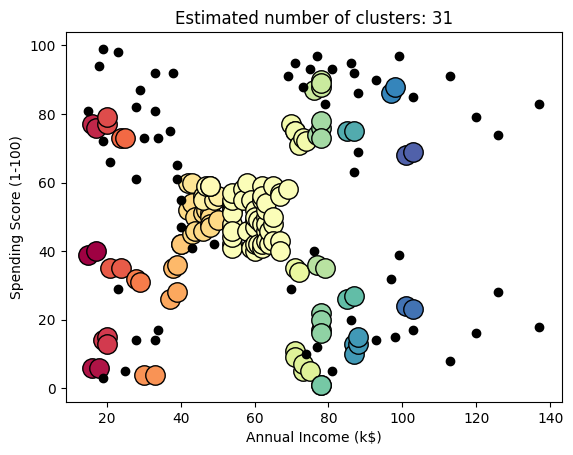

In [30]:
import numpy as np
import matplotlib.pyplot as plt
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x.iloc[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x.iloc[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel(x.columns[0])
plt.ylabel(x.columns[1])
plt.show()